# Building Intake-ESM datastores of ACCESS model output

**Aims**: This tutorial will demonstrate how users can build Intake-ESM datastores for their ACCESS model runs using the `access-nri-intake` Python package

**Project membership requirements**:

 - If using the `xp65` conda environment: `xp65` and `p73`
 - If using the `hh5` conda environment: `hh5` and `p73`

The ACCESS-NRI Intake Catalog is curated by ACCESS-NRI with further information on its <a href="https://access-nri-intake-catalog.readthedocs.io/en/latest/index.html" target="_blank">documentation website</a> and <a href="https://access-hive.org.au/model_evaluation/model_evaluation_model_catalogs" target="_blank">this ACCESS-Hive page</a>.

----

Builders classes for creating Intake-ESM datastores for different ACCESS model outputs are available in the `builders` submodule of the `access_nri_intake` Python package. There are currently Builders for outputs from ACCESS-OM2, ACCESS-CM2 and ACCESS-ESM1.5.

In this tutorial, we'll build an Intake-ESM datastore for an ACCESS-CM2 model run with output at:

`/g/data/p73/archive/non-CMIP/ACCESS-CM2/by578`.

Because we're looking at ACCESS-CM2 output, we'll use the `AccessCm2Builder` class

In [1]:
import os

from access_nri_intake.source.builders import AccessCm2Builder

# Building the datastore

Building the Intake-ESM catalog should be as simple as passing the model run base output directory to the Builder and calling `.build()`. The build is parallelized so will be faster if you throw more resources at it. The following was run using an Large `normalbw` ARE instance (7 cpus).

In [2]:
%%time

builder = AccessCm2Builder(
    path="/g/data/p73/archive/non-CMIP/ACCESS-CM2/by578",
    ensemble=False # We could use this to pass multiple paths for different ensemble members
).build()

CPU times: user 4.14 s, sys: 2.34 s, total: 6.48 s
Wall time: 48.7 s


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/access_nri_intake/source/builders.py:152: UserWarning: Unable to parse 120 assets. A list of these assets can be found in `.invalid_assets` attribute.
  self.get_assets().validate_parser().parse().clean_dataframe()


The previous cell builds the Intake-ESM datastore in memory. We'll want to save it somewhere so we can reuse and share it. The following cell will create two new files (a `.json` and `.csv` file) in your current work directory. These files are how Intake-ESM datastores are stored on disk.

In [3]:
builder.save(
    name="mydatastore", 
    description="An example datastore for ACCESS-CM2 by578",
)

Successfully wrote ESM catalog json file to: file:///home/599/ds0092/mydatastore.json


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/pydantic/deprecated/decorator.py:222: UserWarning: Unable to parse 120 assets/files. A list of these assets can be found in /jobfs/93404145.gadi-pbs/mydatastore_invalid_assets.csv.
  return self.raw_function(**d, **var_kwargs)


# Using your datastore

Now we can use our Intake-ESM datastore to query and load the model data. We saw the basics of how to do this in the previous tutorial - see also the Intake-ESM documentation [here](https://intake-esm.readthedocs.io/en/stable/index.html).

We can load the datastore directly using `intake`.

In [4]:
import intake

esm_datastore = intake.open_esm_datastore(
    "./mydatastore.json", 
    columns_with_iterables=["variable"] # This is important
)

esm_datastore

,unique
path,270
realm,3
variable,652
frequency,2
start_date,60
end_date,60
member,1
variable_long_name,7
variable_standard_name,6
variable_cell_methods,7


It's easy to search for datasets in the datastore containing a particular variable and load them as xarray Datasets. (Note for analysing large datasets, you may want to first start a dask cluster).

In [5]:
ds = esm_datastore.search(variable="temp").to_dask()

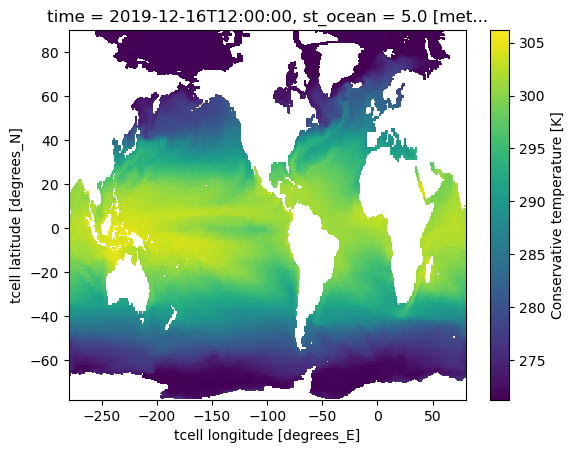

In [6]:
ds["temp"].isel(time=-1, st_ocean=0).plot()

If you think your ACCESS model data is worth sharing more widely, it might be a good idea to include it in the ACCESS-NRI Intake catalog. We're still working on requirements for data to be included in the catalog, but please feel free to open an issue here to discuss: https://github.com/ACCESS-NRI/access-nri-intake-catalog/issues/new/choose

## Challenge yourself

Have you run an ACCESS model and have some output data? Can you create an Intake-ESM datastore for them?